In [1]:
import numpy as np
import hAPTM
reload(hAPTM)

<module 'hAPTM' from 'hAPTM.pyc'>

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
H = hAPTM.hAPTM()
#direc = "/media/nadia/TOSHIBA EXT/PTM/data/"
#direc = "D:/PTM/data/school_collection/"
direc = "D:/PTM/data/postnauka/"
H.parseFromTxt(direc+"ndw.txt")
H.parseDictionaryFromTxt(direc+"dict.txt", True)

In [99]:
H = hAPTM.hAPTM()
#direc = "/media/nadia/TOSHIBA EXT/PTM/data/"
direc = "D:/PTM/data/phrases_collection_versions/phrases/"
H.parseFromTxt(direc+"ndw.txt")
H.parseDictionaryFromTxt(direc+"dict.txt", False)

In [109]:
import copy
Hp = copy.deepcopy(H)

In [110]:
H.reset([1, 8, 35])

In [30]:
H.D

1728

In [111]:
L = len(Hp.graph.phis)
for l in range(L):
    H.graph.phis[l][:, :] = Hp.graph.phis[l][:, :]
for l in range(L-1):
    H.graph.psis[l][:, :] = Hp.graph.psis[l][:, :]

In [159]:
H.graph.psis[1][: ,:] = np.random.rand(*H.graph.psis[1].shape)
H.graph.psis[1] /= H.graph.psis[1].sum(axis=0)[np.newaxis, :]

In [116]:
%time LL = H.construct(40)

Wall time: 28min 29s


In [ ]:
for it in range(20):
    LL += H.construct(1)
    scores = H.regularize(1.5, None, None, True)
    print scores

In [160]:
LL += H.construct(20)

In [161]:
LL += H.construct(20)

In [116]:
H.graph.params = {"smooth_phi": {"pow": 2.5, "coef": 1e9}}
LL4 = H.construct(20)

In [84]:
self = H.graph
common_phi = np.zeros((self.phis[0].shape[0], 0))
theta = self.theta
for phi_idx in range(self.L-1, -1, -1):
    p_s = (theta*(self.eta[phi_idx, :]*self.p_d)[np.newaxis, :]).sum(axis=1)
    common_phi = np.hstack((common_phi, self.phis[phi_idx]*p_s[np.newaxis, :]))
    if phi_idx > 0:
        theta = self.psis[phi_idx-1].dot(theta)
topics_count = common_phi.shape[1]
common_phi /= common_phi.sum(axis=1)[:, np.newaxis] + 1e-100

In [74]:
intervals, topics_count

(array([ 0, 40, 49, 50], dtype=int64), 50L)

In [231]:
LL_cp = LL

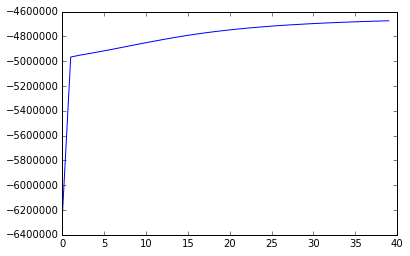

In [230]:
plt.plot(LL)

In [52]:
intervals

array([ 0,  1, 10, 50], dtype=int64)

In [28]:
H.graph.build(10)

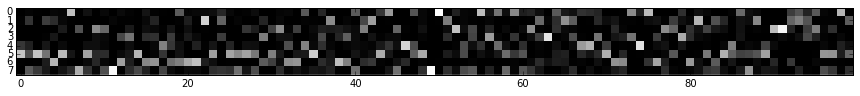

In [209]:
plt.figure(figsize=(15, 7))
plt.imshow((Hp.graph.theta)[:, :100], cmap="gray", interpolation="none")

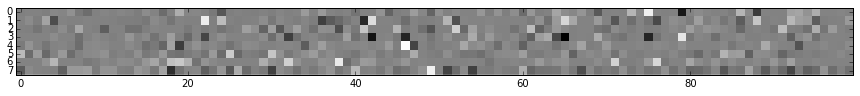

In [212]:
plt.figure(figsize=(15, 7))
plt.imshow((Hp.graph.theta)[:, :100]-(H.graph.psis[1].dot(H.graph.theta))[:, :100], cmap="gray", interpolation="none")

In [215]:
H.graph.eta.T

array([[  8.26861403e-11,   1.53740172e-02,   9.84625983e-01],
       [  2.65672550e-05,   7.27594509e-01,   2.72378924e-01],
       [  1.28717803e-01,   5.81084892e-02,   8.13173707e-01],
       ..., 
       [  2.60263233e-01,   1.86556620e-11,   7.39736767e-01],
       [  5.26533495e-03,   3.50991992e-06,   9.94731155e-01],
       [  2.07882179e-02,   7.58588198e-02,   9.03352962e-01]])

In [69]:
for i, li in enumerate(H.graph.psis[1].T):
    print "%3d"%i,
    for el in li:
        print "%5f"%el,
    print

  0 0.000003 0.200580 0.650888 0.039368 0.000000 0.083653 0.025507 0.000000
  1 0.000153 0.064881 0.714842 0.012303 0.000000 0.161596 0.046220 0.000005
  2 0.060469 0.000303 0.013887 0.000321 0.000052 0.545237 0.379707 0.000024
  3 0.006184 0.179043 0.201388 0.430008 0.037174 0.129062 0.017140 0.000002
  4 0.000160 0.296052 0.545252 0.083039 0.000000 0.055307 0.020178 0.000012
  5 0.000612 0.052879 0.017876 0.000009 0.000086 0.051999 0.876534 0.000005
  6 0.886486 0.010602 0.005004 0.000000 0.000000 0.083432 0.014476 0.000000
  7 0.000042 0.000171 0.002002 0.000000 0.000000 0.012080 0.003549 0.982155
  8 0.862096 0.079043 0.012872 0.000147 0.000000 0.044365 0.001475 0.000002
  9 0.001658 0.022721 0.010737 0.000049 0.000001 0.092479 0.872353 0.000001
 10 0.000137 0.784781 0.083885 0.075170 0.000000 0.055335 0.000692 0.000000
 11 0.004653 0.665488 0.077200 0.090333 0.000000 0.111373 0.050953 0.000000
 12 0.002950 0.008616 0.007337 0.000002 0.001417 0.167907 0.175192 0.636577
 13 0.203855

In [51]:
phi1 = H.graph.phis[1] + H.graph.phis[2].dot(H.graph.psis[1].T)

In [38]:
H.printLevel(0, {"phi_top"}, 95)

Top phi:
Topic 0 свой, самый, какой-то, говорить, наука, например, новый, большой, становиться, являться, происходить, образ, называть, век, существовать, проблема, разный, рассказывать, дело, оказываться, вопрос, мир, знать, должный, история, начинать, возникать, поэтому, некоторый, современный, понимать, культура, сторона, друг, русский, часть, работа, вид, видеть, случай, появляться, сделать, давать, политический, теория, создавать, развитие, делать, определенный, достаточно, интересный, момент, смысл, точка, социальный, представлять, связывать, текст, форма, находиться, основной, что-то, отношение, ситуация, группа, далее, называться, совершенно, позволять, идти, результат, конец, место, тип, показывать, высокий, доктор, понятие, находить, россия, слово, связанный, число, известный, принцип, идея, роль, любой, многий, изучать, либо, кандидат, общий, жить


In [113]:
H.printLevel(1, {"phi_top"}, 55)

Top phi:
Topic 0 клетка, днк, белок, ген, молекула, организм, структура, геном, последовательность, биологический, происходить, биология, рнк, форма, разный, образ, являться, система, рассказывать, функция, молекулярный, самый, эволюция, наука, процесс, какой-то, генетический, нервный, оказываться, существовать, флуоресцентный, живой, бактерия, изменение, вид, развитие, отбор, мутация, вирус, животное, белка, работа, спираль, новый, нужный, понимать, работать, метод, совершенно, получаться, случай, уровень, например, определять
Topic 1 звезда, планета, земля, большой, система, масса, вещество, нейтронный, атмосфера, белый, карлик, видеть, объект, солнце, космический, какой-то, излучение, самый, энергия, происходить, поэтому, поверхность, получать, находиться, телескоп, процесс, достаточно, интересный, свой, примерно, начинать, солнечный, открывать, размер, маленький, знать, тип, разный, существовать, спектр, температура, радиус, говорить, порядок, изучать, расстояние, поскольку, станов

In [114]:
H.printLevel(2, {"phi_top"}, 55)

Top phi:
Topic 0 боль, трудность, животное, какой-то, проблема, самый, вид, организм, говорить, пациент, развитие, фильм, создавать, далее, стратегия, разный, лечение, являться, свой, книга, называть, психология, психологический, вегетативный, след, наука, существовать, группа, анализ, деструктивный, например, новый, изменение, личность, некоторый, поведенческий, тип, находить, стресс, отношение, самоутверждение, поведение, иной, современный, синдром, понимать, болевой, сожаление, метод, друг, конец, существо, конструктивный, нарушение
Topic 1 решение, теория, говорить, например, социальный, свой, какой-то, самый, вопрос, знать, экономический, должный, экономист, некоторый, экономика, ценность, проблема, принятие, являться, язык, большой, понимать, объект, диабет, информация, точка, парк, исследование, что-то, принимать, сахарный, делать, выбор, сторона, оказываться, группа, дело, область, благо, деньги, социологический, ситуация, пытаться, разный, общественный, видеть, предполагать, н

In [ ]:
print "Top phi:"
sorted_idxs = np.argsort(phi1, axis=0)
for i in range(sorted_idxs.shape[1]):
    print "Topic", str(i), ", ".join([H.dictionary[j].lower() for j in sorted_idxs[:-30:-1, i]])

In [11]:
H.addReg(0, "sp_sm_Phi_prior", np.array([-5000]*5+[10000, 0])*10, 10)
H.addReg(0, "sp_sm_Phi", np.array([0 for i in range(6)]+[-10]))
H.addReg(0, "sp_sm_Theta", np.array([-5]*5+[10, 10])*0.1, 10)
H.addReg(0, "dec", 1e6)
%time H.constructLevel(0, 10)

iteration = 0
iteration = 1
iteration = 2
iteration = 3
iteration = 4
iteration = 5
iteration = 6
iteration = 7
iteration = 8
iteration = 9
Wall time: 32.5 s


In [14]:
np.set_printoptions(precision=4, suppress=True)
H.levels[0].theta.T[:10]

array([[ 0.    ,  0.1704,  0.2359,  0.5668,  0.0269],
       [ 0.    ,  0.006 ,  0.    ,  0.9659,  0.0282],
       [ 0.    ,  0.    ,  0.    ,  0.9931,  0.0069],
       [ 0.    ,  0.3306,  0.0545,  0.5838,  0.0311],
       [ 0.4913,  0.0015,  0.0039,  0.4969,  0.0064],
       [ 0.3845,  0.    ,  0.    ,  0.5561,  0.0594],
       [ 0.    ,  0.    ,  0.3305,  0.4704,  0.1991],
       [ 0.    ,  0.    ,  0.    ,  0.9821,  0.0179],
       [ 0.    ,  0.3   ,  0.    ,  0.6717,  0.0282],
       [ 0.    ,  0.5096,  0.    ,  0.4014,  0.0889]])

In [110]:
H.printLevel(0, {"phi_top"}, 20)

Top phi:
Topic 0 и, в, он, который, свой, не, что, герой, человек, на, его, произведение, жизнь, это, то, с, этот, о, русский


In [24]:
del H.levels[1]
H.addLevel(20, lambda_=1)

S= 20
costruct S= 20
Added 1 -th level


In [118]:
import pickle
with open("D:/PTM/experiments/conc_March/models/conc_postnauka_3lev_notreg_manyit", "w") as f:
    pickle.dump(H, f)

In [108]:
with open("D:/PTM/experiments/conc_March/models/conc_postnauka_2lev_notreg") as f:
    H = pickle.load(f)

In [104]:
class Visualizator:
    def __init__(self, H, titles_file, links_file):
        self.pages = {}
        self.dictionary = H.dictionary
        self.read_files(titles_file, links_file)
        
        
    def read_files(self, titles_file, links_file):
        self.titles = {}
        self.authors = {}
        self.links = {}
        with open(titles_file, "r") as fin:
            while True:
                doc = fin.readline()
                if not len(doc):
                    break
                doc = int(doc[:-1])
                authors = fin.readline()[:-1]
                title = fin.readline()[:-1]
                self.titles[doc] = title
                self.authors[doc] = authors
        with open(links_file, "r") as fin:
            for line in fin:
                doc, link = line[:-1].split("|")
                self.links[int(doc)] = link
                
        
    def fill(self, top_words_cnt=10, top_docs_cnt=100, psi_threshold=0.5):
        """
        collects topics info and creates graph of topics
        """
        theta = H.graph.theta
        for l in range(len(H.graph.phis)-1, -1, -1):
            antitops_words = np.argsort(H.graph.phis[l], axis=0)
            antitops_docs = np.argsort(theta, axis=1)   # *H.graph.eta[l][np.newaxis, :]
            for t in range(H.graph.phis[l].shape[1]):
                self.pages[(l, t)] = TopicPage(l, "Level "+str(l)+" Topic "+str(t),\
                                               "l"+str(l)+"t"+str(t)+".html",\
                                              [self.dictionary[w] for w in antitops_words[-1:-top_words_cnt-1:-1, t]],\
                                              [(self.titles[d], self.authors[d], self.links[d]) for d in \
                                              antitops_docs[t, -1:-top_docs_cnt-1:-1]], [], [])
            if l > 0:
                theta = H.graph.psis[l-1].dot(theta)
        
        for l in range(len(H.graph.psis)-1, -1, -1):
            for t in range(H.graph.psis[l].shape[0]):
                for s in range(H.graph.psis[l].shape[1]):
                    if H.graph.psis[l][t, s] > psi_threshold:
                        self.pages[(l, t)].children.append(self.pages[(l+1, s)])
                        self.pages[(l+1, s)].parents.append(self.pages[(l, t)])
          
                
                
    def print_pages(self, path):
        """
        prints pages to path
        """
        for key in self.pages.keys():
            self.pages[key].print_page(path)
        
        
class TopicPage:
    def __init__(self, level=0, title="", link="", top_words=[], top_docs=[], children=[], parents=[]):
        """
        Class for storing Visualizator nodes
        Args:
        level is int
        title is a string
        link is a string
        top_words is a list of words
        top_docs is a list of tuples (doc_title, doc_author, doc_link)
        children is a list of TopicPage instances
        parents is a list of TopicPage instances
        """
        self.level = level
        self.title = title
        self.link = link
        self.top_words = top_words
        self.top_docs = top_docs
        self.children = children
        self.parents = parents
        
        
    def print_page(self, path):
        with open(path+self.link, "w") as fout:
            fout.write("<!DOCTYPE HTML PUBLIC '-//W3C//DTD HTML 4.01 Transitional//EN'>"\
                '<html lang="en">\n<head>\n<meta content="text/html; charset=utf-8" http-equiv="Content-Type" />\n'\
                '<link media="all" href="style.css" type="text/css" rel="stylesheet" />\n'\
                "<title>"+self.title+"</title>\n"'<script src="script.js" type="text/javascript"></script>\n'\
                '</head>\n<body>\n')
            if self.level > 0:
                fout.write('<div class="parents">\n<h3> Надтемы: </h3>\n<ul>\n')
                for parent in self.parents:
                    fout.write('<li><a href="'+str(parent.link)+'"> '+str(parent.title)+' </a></li>\n')
                fout.write("</ul>\n</div>\n")
            else:
                fout.write('<div class="parents"> <br> </div>\n')
            fout.write('<div class="main_topic">\n')
            fout.write("<h1>"+self.title+"</h1>\n")
            fout.write("<p>"+", ".join(self.top_words)+"</p>\n")
            fout.write("<ul>")
            for title, author, link in self.top_docs:
                fout.write('<li><a href="'+link+'">'+title+" ("+author+") </a></li>\n")
            fout.write("</ul>\n</div>\n<br>\n")
            if self.children:
                width = 30 / float(len(self.children))
            fout.write('<div class="inline">\n')
            for child in self.children:
                fout.write('<div class="child_topic" style="width:'+str(width)+'cm;">\n')
                fout.write('<h2><a href="'+child.link+'">'+child.title+'</a></h2>\n')
                fout.write("<p>"+", ".join(child.top_words)+"</p>\n")
                fout.write("<ul>")
                for title, author, link in child.top_docs:
                    fout.write('<li><a href="'+link+'">'+title+" ("+author+") </a></li>\n")
                fout.write("</ul>\n</div>\n")
            fout.write("</div>\n</body>\n</html>")

In [117]:
vis = Visualizator(H, "D:/PTM/data/postnauka/titles.txt", "D:/PTM/data/postnauka/urls.txt")
vis.fill()
vis.print_pages("D:/PTM/visualization/site_mar21_2/")

In [83]:
len(vis.pages[(2, 3)].parents)

37